### Grupo 21: Thiago e Gabriele

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

O dataset abaixo possui 1632 linhas, contendo 1438 títulos de jogos de 9 plataformas diferentes. São 11 variáveis, sendo elas: nome', 'plataforma', 'genero', 'editora', 'vendas', 'lancamento','avaliacao-criticos', 'numero-criticos', 'avaliacao-usuarios',     'numero-usuarios', 'fabricante'.

In [24]:
pasta_drive = ''
dados = pd.read_csv(pasta_drive + "trabalho2_dados_21.csv")

dados

,nome,plataforma,genero,editora,vendas,lancamento,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios,fabricante
0,Green Lantern: Rise of the Manhunters,X360,Action,Warner Bros. Interactive Entertainment,0.10,7-Jun-11,59.0,17.0,7,22.0,Double Helix Games
1,Kinect Sports: Season Two,X360,Sports,Microsoft Game Studios,2.18,25-Oct-11,66.0,46.0,6.3,27.0,"BigPark, Rare Ltd."
2,Brothers in Arms: Double Time,Wii,Shooter,Ubisoft,0.12,23-Sep-08,45.0,13.0,6.6,17.0,Gearbox Software
3,Steambot Chronicles: Battle Tournament,PSP,Fighting,Irem Software Engineering,0.06,30-Jun-09,54.0,14.0,6.1,7.0,Irem
4,Tiger Woods PGA Tour 07,Wii,Sports,Electronic Arts,0.46,13-Mar-07,71.0,41.0,6.9,44.0,EA Redwood Shores
...,...,...,...,...,...,...,...,...,...,...,...
1627,Lost Planet: Extreme Condition,X360,Shooter,Capcom,1.31,12-Jan-07,79.0,76.0,7.1,161.0,Capcom
1628,Biohazard: Revival Selection,X360,Action,Capcom,0.03,NaN,NaN,NaN,NaN,NaN,NaN
1629,Ratatouille,X360,Platform,THQ,0.24,26-Jun-07,56.0,14.0,tbd,NaN,Heavy Iron Studios
1630,Catherine,PS3,Adventure,Deep Silver,0.60,26-Jul-11,79.0,61.0,7.8,246.0,Atlus


In [25]:
#ordena o resultado pelo nome do jogo
dados = dados.sort_values('nome')
dados.head()

,nome,plataforma,genero,editora,vendas,lancamento,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios,fabricante
1555,0-ji no Kane to Cinderella: Halloween Wedding,PSP,Misc,Quinrose,0.01,NaN,NaN,NaN,NaN,NaN,NaN
738,007: Quantum of Solace,PS3,Action,Activision,1.09,NaN,NaN,NaN,NaN,NaN,NaN
1197,007: Quantum of Solace,Wii,Action,Activision,0.62,NaN,NaN,NaN,NaN,NaN,NaN
1307,1/2 Summer +,PSP,Adventure,Kaga Create,0.01,NaN,NaN,NaN,NaN,NaN,NaN
1456,10 Minute Solution,Wii,Sports,Activision,0.06,29-Jun-10,NaN,NaN,tbd,NaN,Anchor Bay Entertainment


Analisando os tipos de cada varíavel.

In [26]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 1555 to 669
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nome                1632 non-null   object 
 1   plataforma          1632 non-null   object 
 2   genero              1632 non-null   object 
 3   editora             1630 non-null   object 
 4   vendas              1632 non-null   float64
 5   lancamento          1137 non-null   object 
 6   avaliacao-criticos  916 non-null    float64
 7   numero-criticos     916 non-null    float64
 8   avaliacao-usuarios  1112 non-null   object 
 9   numero-usuarios     851 non-null    float64
 10  fabricante          1128 non-null   object 
dtypes: float64(4), object(7)
memory usage: 153.0+ KB


Antes de começarmos a análise, iremos transformar o parâmetro gênero em uma variável categórica. Outra questão, observada pelo .info(), é o tipo da variável  avaliacao-usuarios, vamos passar para float.

In [27]:
dados['genero'] = dados.genero.astype('category')
dados['plataforma'] = dados.plataforma.astype('category')
dados['avaliacao-usuarios'] = pd.to_numeric(dados['avaliacao-usuarios'],errors='coerce')
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 1555 to 669
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   nome                1632 non-null   object  
 1   plataforma          1632 non-null   category
 2   genero              1632 non-null   category
 3   editora             1630 non-null   object  
 4   vendas              1632 non-null   float64 
 5   lancamento          1137 non-null   object  
 6   avaliacao-criticos  916 non-null    float64 
 7   numero-criticos     916 non-null    float64 
 8   avaliacao-usuarios  851 non-null    float64 
 9   numero-usuarios     851 non-null    float64 
 10  fabricante          1128 non-null   object  
dtypes: category(2), float64(5), object(4)
memory usage: 131.5+ KB


Como podemos observar na tabela acima, temos valores nulos no dataframe. Portanto, iremos retirar aquelas linhas que possuem valores nulos, para não atrapalhar a nossa análise.

In [28]:
dados.dropna(axis=0,inplace=True)

In [29]:
dados.isnull().any()

nome                  False
plataforma            False
genero                False
editora               False
vendas                False
lancamento            False
avaliacao-criticos    False
numero-criticos       False
avaliacao-usuarios    False
numero-usuarios       False
fabricante            False
dtype: bool

Analisando a frequência, desvio padrão, média e outros cálculos estatísticos, iremos aplicar o describe() no dataframe.

In [30]:
dados.describe()

,vendas,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios
count,805.000000,805.000000,805.000000,805.000000,805.000000
mean,0.884025,69.073292,34.724224,6.914783,119.853416
std,1.916295,14.531433,21.408221,1.495613,313.970149
min,0.010000,13.000000,4.000000,0.900000,4.000000
25%,0.160000,61.000000,17.000000,6.200000,13.000000
50%,0.380000,72.000000,32.000000,7.200000,29.000000
75%,0.850000,80.000000,49.000000,8.000000,85.000000
max,27.250000,98.000000,101.000000,9.500000,2923.000000


Uma vez que retiramos os valores nulos, todas as variáveis possuem a mesma quantidade de valores.

In [31]:
#describe
print('**Describe das variáveis que não são numéricas')
for i in dados.keys():
    if type(dados[i][0])!=np.float64:
        print(dados[i].describe())
        print("\n")

**Describe das variáveis que não são numéricas
count                              805
unique                             695
top       LEGO Harry Potter: Years 5-7
freq                                 5
Name: nome, dtype: object


count      805
unique       9
top       X360
freq       256
Name: plataforma, dtype: object


count        805
unique        12
top       Action
freq         206
Name: genero, dtype: object


count                 805
unique                 78
top       Electronic Arts
freq                  125
Name: editora, dtype: object


count           805
unique          421
top       20-Oct-09
freq              9
Name: lancamento, dtype: object


count           805
unique          361
top       EA Canada
freq             25
Name: fabricante, dtype: object




## Análise Inicial

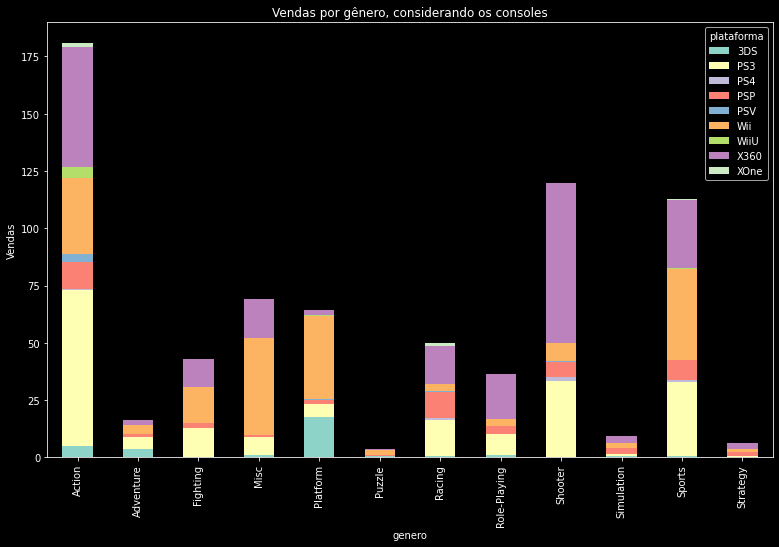

In [33]:
with plt.style.context('dark_background'):
    teste = dados.groupby(['genero','plataforma']).vendas.sum()
    teste.unstack().plot(kind='bar',stacked=True, 
                               grid=False,  figsize=(13,8))
    plt.title('Vendas por gênero, considerando os consoles')
    plt.grid(False)
    plt.ylabel('Vendas')
    plt.show()

De acordo com o gráfico acima, conseguimos observar que os jogos da plaforma X360 abrangem quase todos os gêneros, além de ocuparem o status de maiores vendas na maior parte deles. Outro ponto importante de destacar são as vendas do gênero "Action", que possuem os maiores valores de venda e atendem grande parte das plataformas.

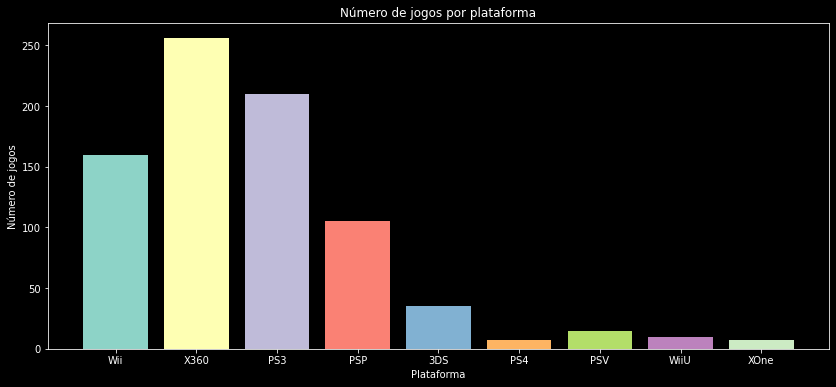

In [48]:
plataformas = dados.plataforma.unique()
plt.figure(figsize=(14,6))
for p in plataformas:
    plt.bar(p, dados[dados.plataforma==p].count()[0])    
plt.title('Número de jogos por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Número de jogos')
plt.show()
#print(arr)

Como podemos observar, este gráfico reforça o resultado mostrado no ínicio da apresentação, que a plataforma X360 é a mais presente no dataset.

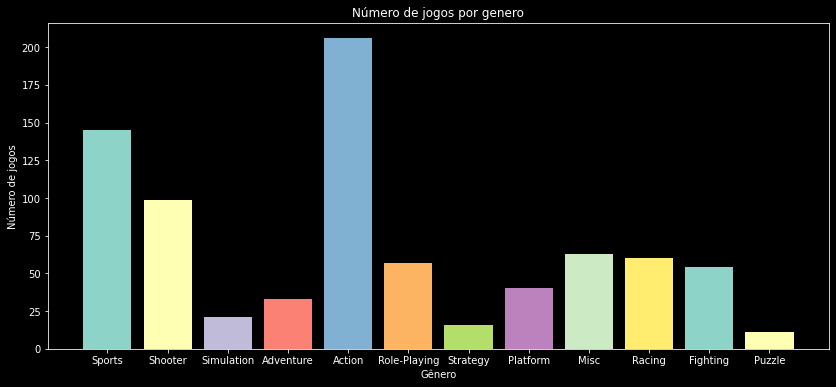

In [27]:
generos = dados.genero.unique()
plt.figure(figsize=(14,6))
for p in generos:
    plt.bar(p, dados[dados.genero==p].count()[0])   
plt.title('Número de jogos por genero')
plt.xlabel('Gênero')
plt.ylabel('Número de jogos')
plt.show()
#print(arr)

## Análise de Correlação

Nesta etapa do trabalho, realizamos uma análise do grau de correlação entre todas as variáveis numéricas. 

In [25]:
dados.corr()

,vendas,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios
vendas,1.000000,0.322639,0.330162,0.131051,0.556160
avaliacao-criticos,0.322639,1.000000,0.463458,0.608111,0.336030
numero-criticos,0.330162,0.463458,1.000000,0.316025,0.467206
avaliacao-usuarios,0.131051,0.608111,0.316025,1.000000,0.102852
numero-usuarios,0.556160,0.336030,0.467206,0.102852,1.000000


C:\Users\Thiago\anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


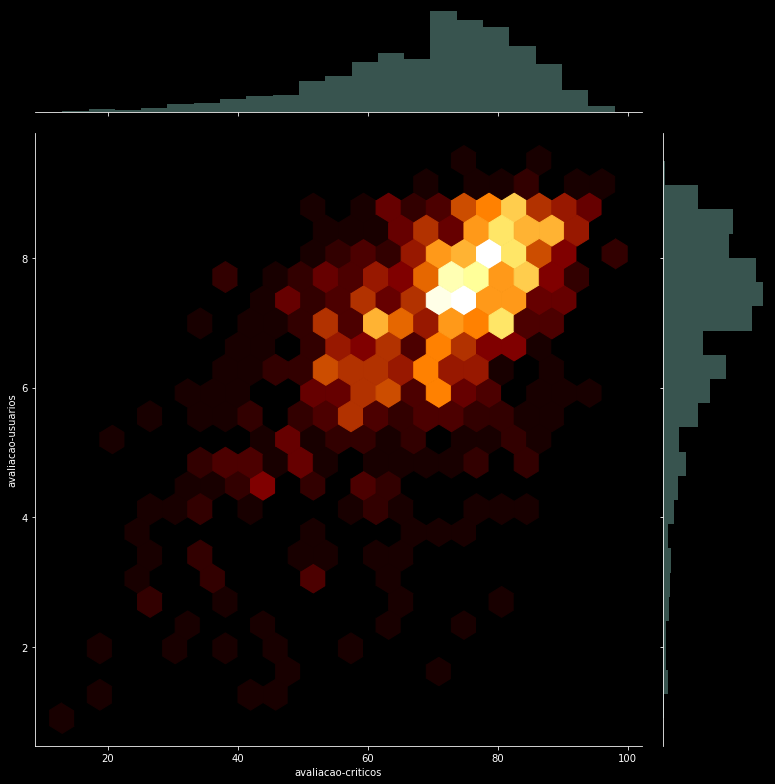

In [49]:
sns.jointplot(x='avaliacao-criticos',y='avaliacao-usuarios',data=dados,
              kind='hex', cmap= 'afmhot', size=11)

Diante do resultado mostrado acima e na tabela, é possível observar que as avaliações dos críticos e dos usuários possuem uma interdependência um pouco mais relavante, quando comparado aos demais valores da tabela, mostrando uma correlação positiva.

O nosso próximo gráfico mostra que, apesar da correlação entre as avaliações(considerando tanto de críticos como usuários) e as vendas ser fraca, a relação entre elas é notória. É importante salientar que correlação não implica, necessariamente, causalidade.

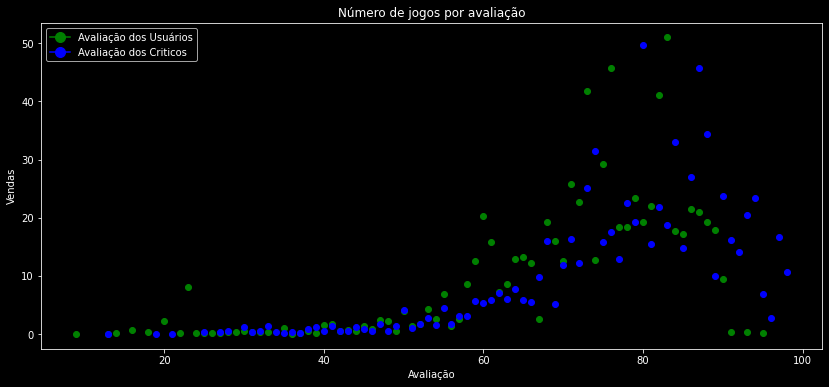

In [47]:
plt.figure(figsize=(14,6))

avaliacoes = dados['avaliacao-usuarios'].unique()
for p in avaliacoes:
    v = dados[dados['avaliacao-usuarios']==p].vendas.sum()
    plt.scatter(p*10, v, color='green')

avaliacoes = dados['avaliacao-criticos'].unique()
for p in avaliacoes:
    plt.scatter(p, dados[dados['avaliacao-criticos']==p].vendas.sum(), color='blue')

plt.title('Número de jogos por avaliação')
plt.xlabel('Avaliação')
plt.ylabel('Vendas')
#plt.legend(['Usuarios','Criticos'])
#plt.xticks(list(range(101,10)))


line_usuarios = mlines.Line2D([], [], color='green', marker='o', 
                          markersize=10, label='Avaliação dos Usuários')

line_criticos = mlines.Line2D([], [], color='blue', marker='o', 
                          markersize=10, label='Avaliação dos Criticos')

plt.legend(handles=[line_usuarios,line_criticos])

plt.grid(False)
plt.show()

Observações